<a href="https://colab.research.google.com/github/AdaiIllanesGutierrez/IntroPlotnine/blob/main/Intro_a_Plotnine_y_barras_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from plotnine import *
import mizani as mz

#<font size="20+"> <font color="blue"> **Plotnine: data + geom -> graph**</font>

En esta clase estudiaremos la biblioteca gráfica ``plotnine`` implementada por Hassan Kibirige.

**¿Qué es plotnine?**

``Plotnine`` es una implementación de una gramática de gráficos en Python que se basa en ``ggplot2`` (de R).

**¿Qué es ggplot?**
  1. Un paquete creado por Hadley Wickham para la visualización de datos en R
  2. Este paquete utiliza una **gramática de gráficos**, que fue desarrollada por Leland Wilkinson.
  3. ggplot nos entrega un conjunto de componentes que al ser combinadas producen gráficos personalizados.

**Galería con algunos gráficos en ggplot:** https://exts.ggplot2.tidyverse.org/gallery/




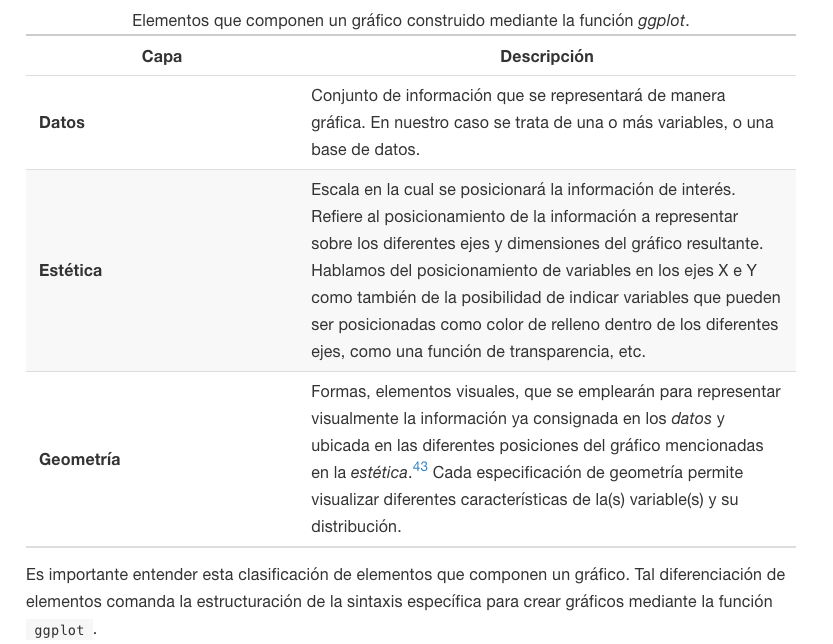

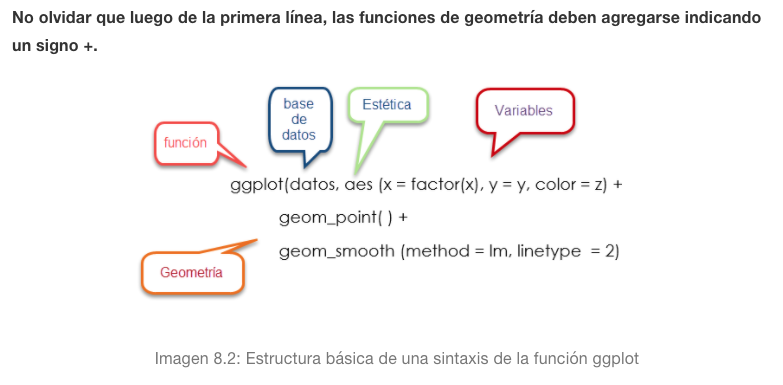

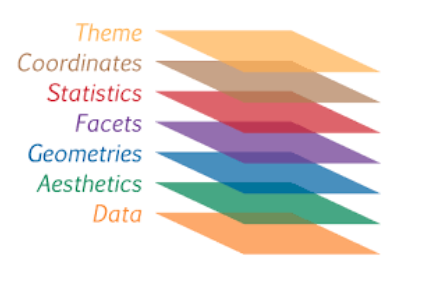

# <font color="teal">**Componentes de un gráfico ggplot** </font>

Todo gráfico en ggplot se construye como una combinación de bloques de construcción que funcionan de forma independiente. Estos bloques estan asociados a los siguientes atributos:

1. **data**: un data frame que se entrega en la declaración del gráfico ``ggplot(data)``
2. **aes**thetic: hace mapeo de las variables del dataframe a propiedades visuales: size, color, x (eje x), y (eje y).
3. **geom**etric: objetos geométricos, puntos lineas, barras, etc
4. **coord**inate system: sistema de coordenadas.
5. **scale**s: nos permitira ajustar los valores de la leyenda, axis, colores, etc.
6. **theme**: se encarga de cambiar el aspecto de un gráfico.

Existen otros bloques de construcción, pero los aprenderémos a medida que construyamos gráficos.

**Para más información sobre todas las opciones de ggplot en plotnine ir a este sitio web:**   https://plotnine.readthedocs.io/en/stable/api.html

**Para más información sobre todas las opciones de ggplot les dejo algunos links de utilidad**

https://ggplot2.tidyverse.org/

https://ggplot2tor.com/theme/

https://www.data-to-viz.com/


#<font size="20+"> <font color="blue"> **Gráficos de Barra**</font>

**¿Qué es un Gráfico de Barra (barplot)?**

Los gráficos de barra o barplots son de los gráficos más utilizados. Nos permiten mostrar la relación entre una variable numérica y una categórica.


#<font color="teal">**Datos mpg**</font>
Usaremos la siguiente base de datos para aprender a crear gráficos de barra:


  Número |Nombre  | Descripción
---------|--------|------------------
 1       |mpg     | Miles/(US) gallon
 2       |cyl     | Number of cylinders
 3       |disp    | Displacement (cu.in.)
 4       |hp      | Gross horsepower
 5       |drat    | Rear axle ratio
 6       |wt      | Weight (1000 lbs)
 7       |qsec    | 1/4 mile time
 8       |vs      | Engine (0 = V-shaped, 1 = straight)
 9       |am      |Transmission (0 = automatic, 1 = manual)
 10      |gear    | Number of forward gears
 11      |carb    |Number of carburetors


In [ ]:
#Importamos statsmodels.api para importar algunos set de datos
import statsmodels.api as sm

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
mtcars.head()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


#<font color="teal">**Nuestro primer gráfico de barras**</font>

**¿Cuántos autos tienen transmisión de tipo automático vs manual?**

1. Los gráficos de barra nos permiten responder esta pregunta fácilmente de manera visual.
2. Para esto solo debemos graficar la variable categórica ``am`` que contiene el tipo de transmisión (0: automática, 1:manual) vs la variable númerica correspondiente al conteo de estas categorias.
3. Antes de graficar pre-procesaremos los datos para que la información sea más clara tanto como para nosotros, como para el lector y el computador.

In [ ]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


In [ ]:
#En este módulo reemplazamos los 0 y 1 por Automático y Manual respectivamente.
mtcars.loc[mtcars['am'] == 0, 'am'] = 'Automático'
mtcars.loc[mtcars['am'] == 1, 'am'] = 'Manual'

In [ ]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [ ]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


**Nuestro primer gráfico de barras:**

Estamos casi listos para graficar la información requerida. Sin embargo, note que en nuestra base de datos no existe explícitamente una columna que tenga el número de autos con transmisión automática o  manual. Para solucionar esto podemos hacer:

Le decimos a ggplot que se encargue de contar por nosotros. Para esto utilizaremos el argumento **y="..count.."** que le indica al "eje y" que debe contar las frecuencias observadas para las categorias de la variable categorica asignada al "eje x".

In [ ]:
13/32

0.40625

In [ ]:
mtcars[['am']].value_counts()

am        
Automático    19
Manual        13
Name: count, dtype: int64

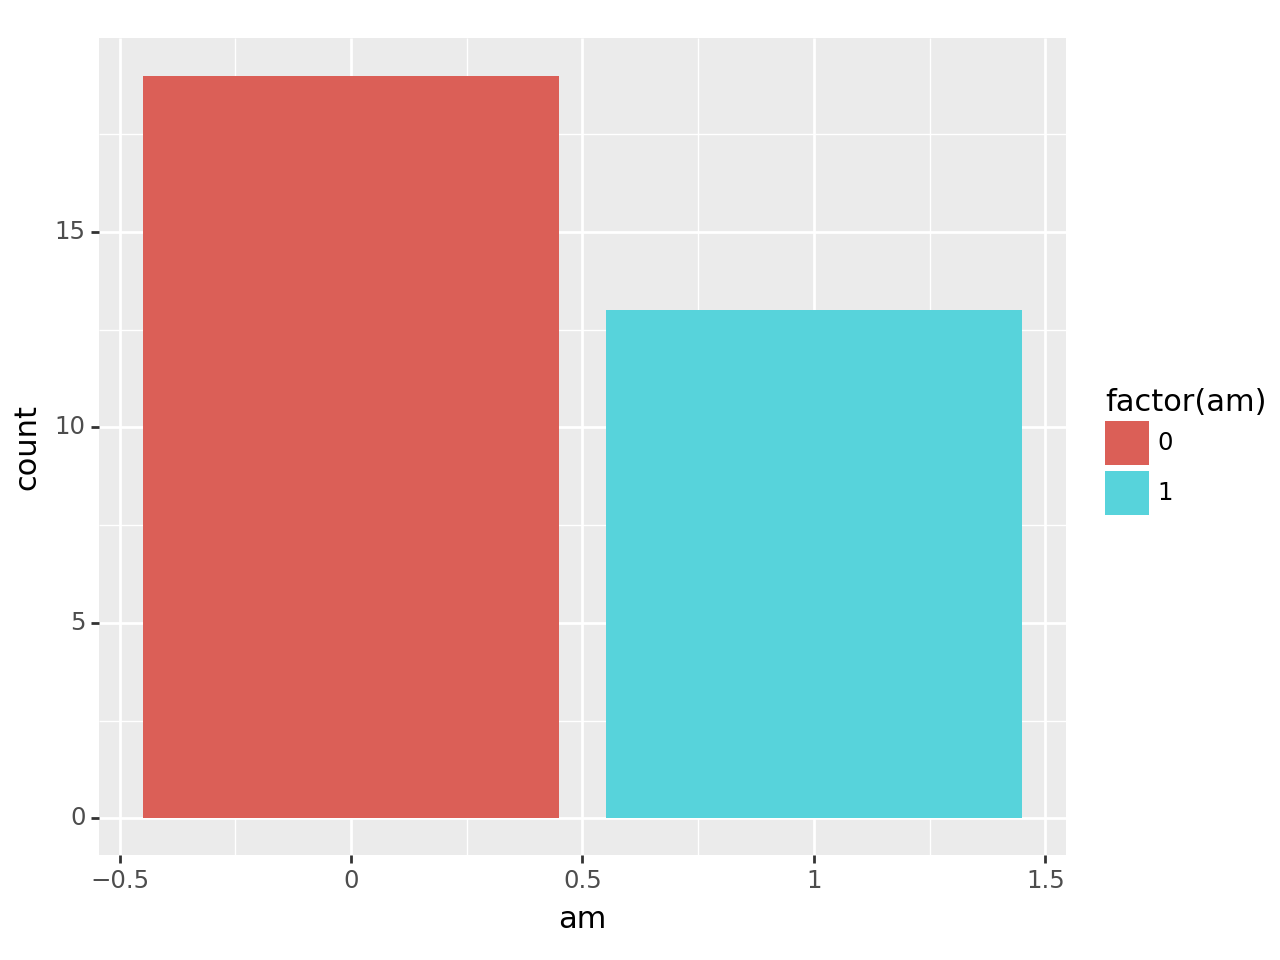

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(mtcars)+
 aes(x="am",y="..count..",fill="factor(am)")+
 geom_bar()
)

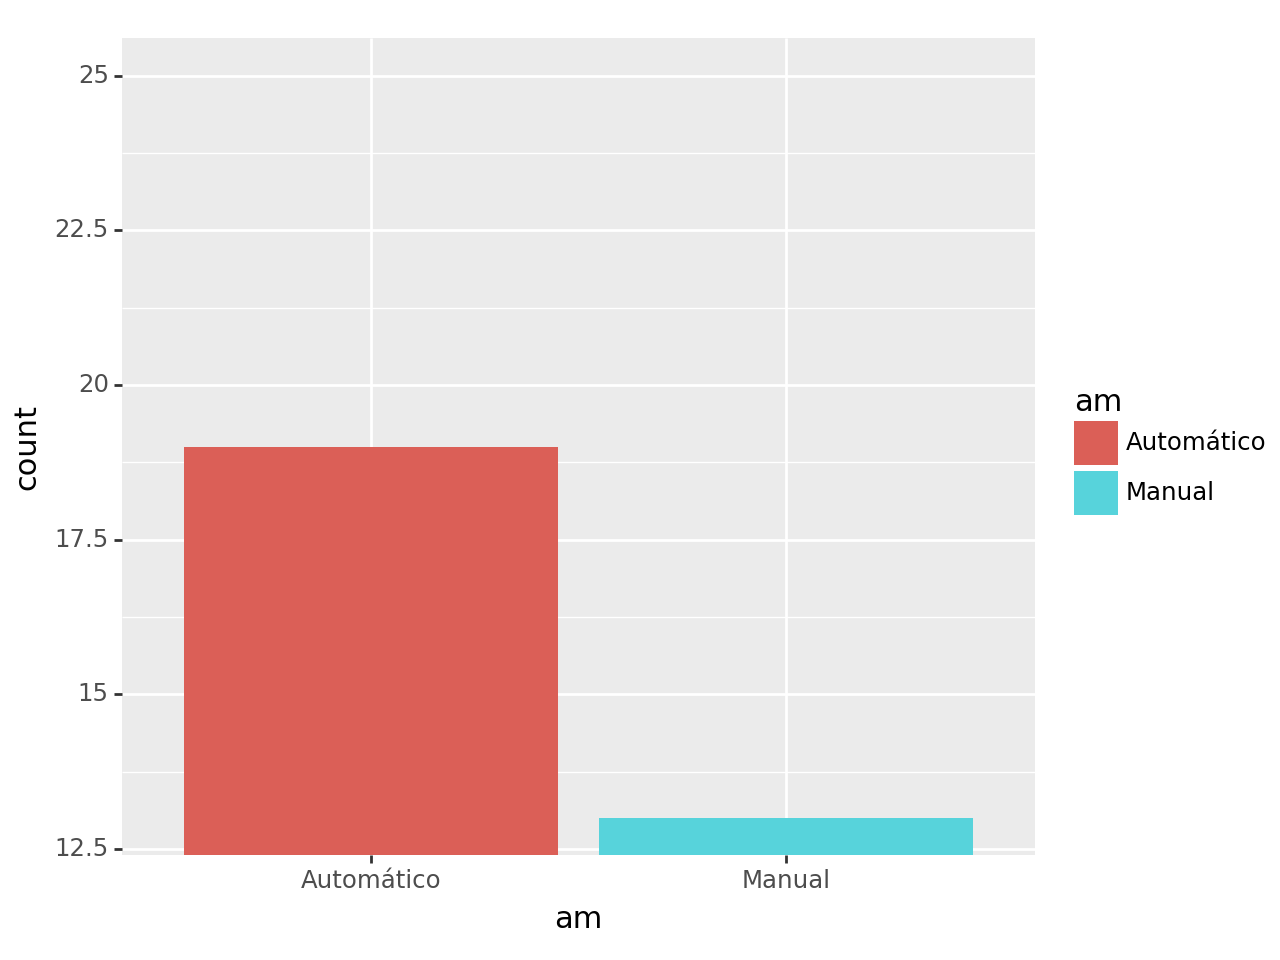

<Figure Size: (640 x 480)>

In [ ]:
#Los gráficos de barra siempre deben comenzar en cero, si esto no es así podemos mal entender nuestros datos!
(ggplot(mtcars)+
 aes(x="am",y="..count..",fill="am")+
 geom_bar()+
 coord_cartesian(ylim = [13, 25])
)

En el caso de querer proporciones asignamos
- **y="..count../sum(..count..)"**: que normaliza las frecuencias obtenidas del eje x.

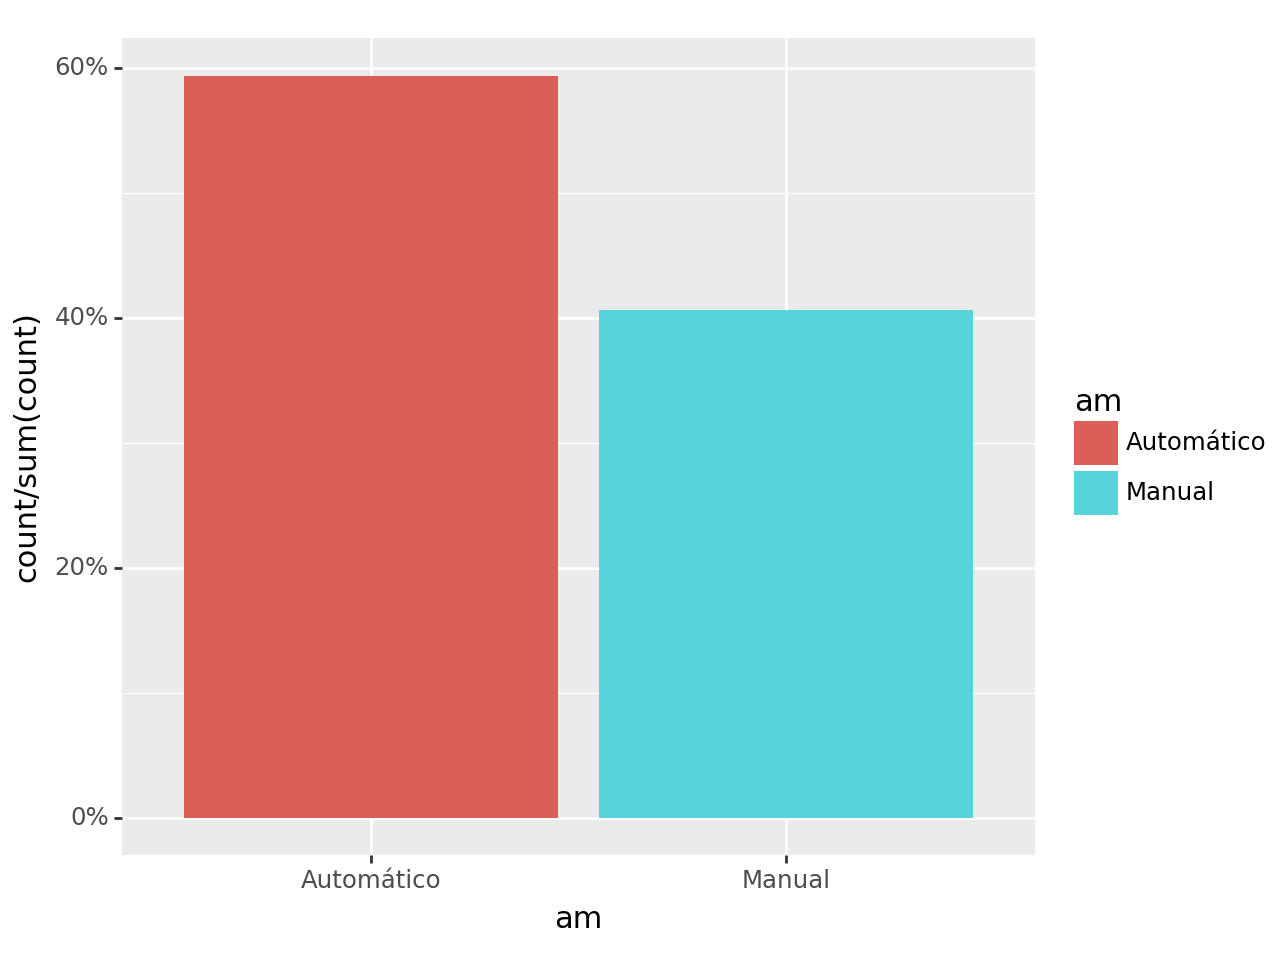

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(mtcars)+
 aes(x="am",y="..count../sum(..count..)",fill="am")+
 geom_bar()+
 scale_y_continuous(labels = mz.formatters.percent_format()) #Este comando transforma la escala del eje y a porcentajes. Usa el paquete mizani (mz)
)

#<font color="teal">**Utilizando 2 o más variables categóricas**</font>

Podemos utilizar los gráficos de barra para estudiar más de una variable categórica al mismo tiempo.

**Ejemplo:** consideremos la variable ``vs`` que denota el tipo de motor: (0:V-shaped, 1:Straight).

In [ ]:
#En este módulo reemplazamos los 0 y 1 por V-shaped y Straight respectivamente.
indice=mtcars["vs"]==0
mtcars["vs"][indice]="V-shaped"

indice=mtcars["vs"]==1
mtcars["vs"][indice]="Straight"

mtcars.head()

<ipython-input-7-ea5f41f670ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,V-shaped,Manual,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,V-shaped,Manual,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,Straight,Manual,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,Straight,Automático,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,V-shaped,Automático,3,2


El siguiente grafico nos permite ver facilmente cual es la distribución del tipo de motor para los diferentes tipos de transmisión (Automática vs Manual)

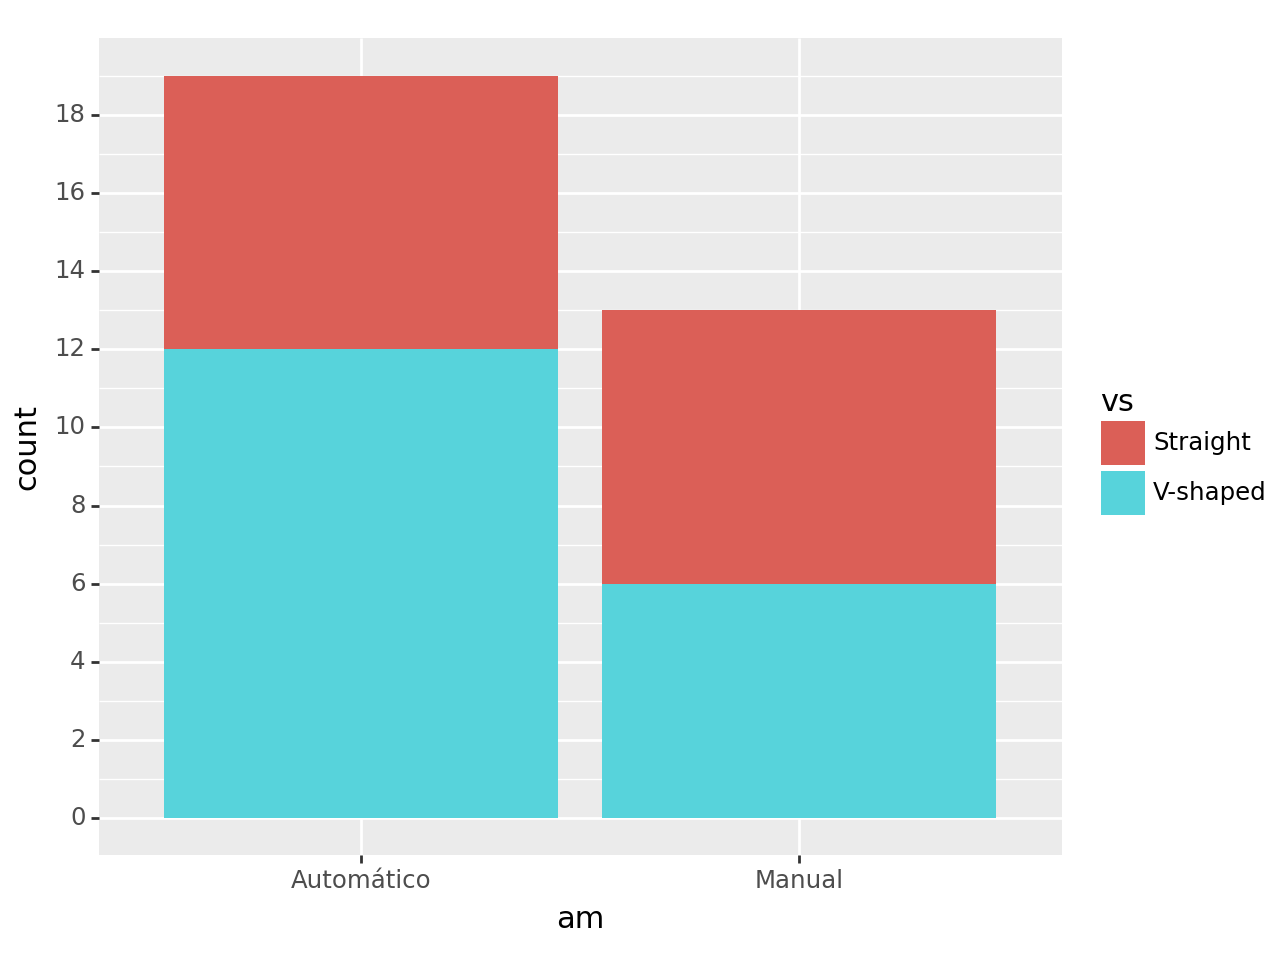

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(mtcars)+
 aes(x="am",fill="vs")+
 geom_bar(stat="count")+
 scale_y_continuous(breaks=[0,2,4,6,8,10,12,14,16,18,20])
)

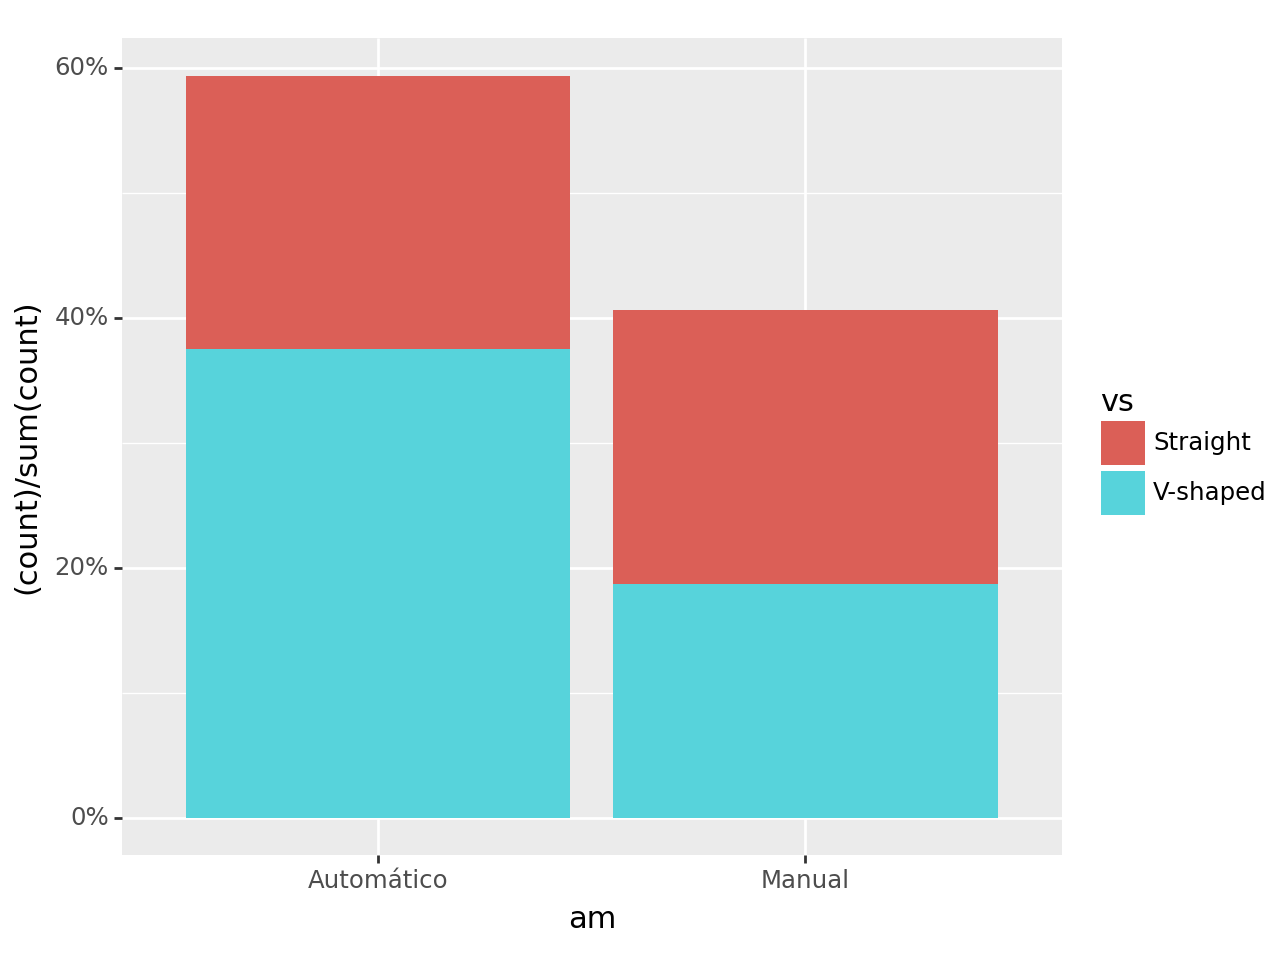

<Figure Size: (640 x 480)>

In [ ]:
#Podemos ver lo mismo que antes, pero en término de proporciones
(ggplot(mtcars)+
 aes(x="am",y="(..count..)/sum(..count..)",fill="vs")+
 geom_bar()+
 scale_y_continuous(labels = mz.formatters.percent_format())

)


## **Posiciones para las barras.**
**ggplot** nos permite hacer 3 tipos de posiciones para las barras
1. **stack:** opción por defecto que divide la barra de acuerdo a la variable en fill
2. **dodge:** esta opción crea múltiples barras asociada a fill
3. **dodge2:** opción dodge pero las barras están más separadas.

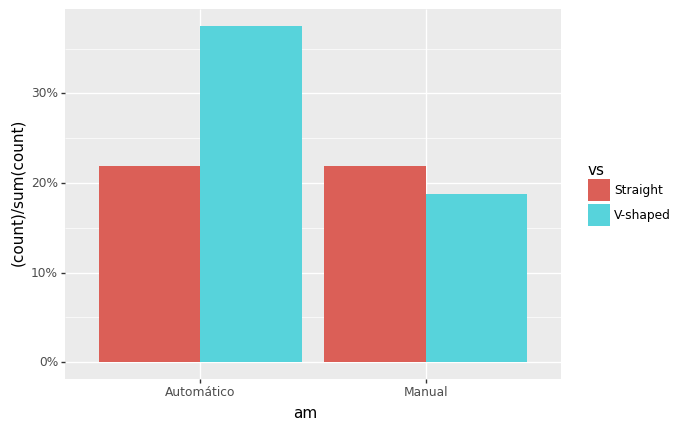

<ggplot: (8786276315674)>

In [ ]:
(ggplot(mtcars)+
 aes(x="am",y="(..count..)/sum(..count..)",fill="vs")+
 geom_bar(position="dodge")+
 scale_y_continuous(labels = mz.formatters.percent_format())
)

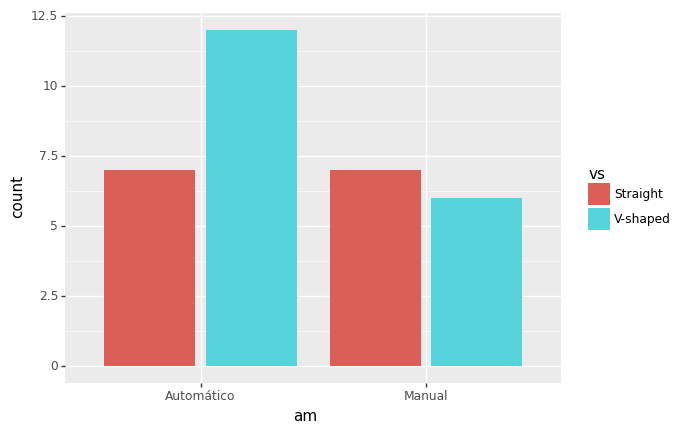

<ggplot: (8786276281354)>

In [ ]:

(ggplot(mtcars)+
 aes(x="am",y="..count..",fill="vs")+
 geom_bar(position="dodge2")
)

**¿Cuál es la distribución del número de cilindros por tipo de auto: automático vs manual?**

- Note que la variable cyl es cuantitativa (discreta), pero para efectos del gráfico la tratamos con una variable categorica.
- Para decirle a ggplot que cyl será trabajada como una variable categoria, utilizamos **factor(cyl)**

In [ ]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   mpg     32 non-null     float64 
 1   cyl     32 non-null     category
 2   disp    32 non-null     float64 
 3   hp      32 non-null     int64   
 4   drat    32 non-null     float64 
 5   wt      32 non-null     float64 
 6   qsec    32 non-null     float64 
 7   vs      32 non-null     object  
 8   am      32 non-null     object  
 9   gear    32 non-null     int64   
 10  carb    32 non-null     int64   
dtypes: category(1), float64(5), int64(3), object(2)
memory usage: 2.9+ KB


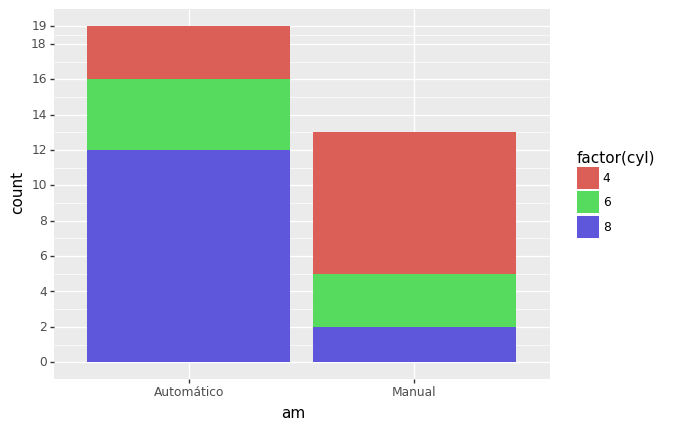

<ggplot: (8791944763350)>

In [ ]:
(ggplot(mtcars)+
 aes(x="am",y="..count..",fill="factor(cyl)")+
 geom_bar()+
 scale_y_continuous(breaks=[0,2,4,6,8,10,12,14,16,18,19])
)

**¿Cuál es la distribución del número de cilindros por tipo de auto (automático vs manual), y por tipo de motor (V-shaped vs Straight)?**

- Si queremos graficar más de una variable categórica podemos usar la opción **facet_wrap([variable3,variable4,...])** que separará en distintas ventanas.
- No abuse de esta opción, recuerde que menos es más.

In [ ]:
mtcars['cyl']=mtcars['cyl'].astype("category")

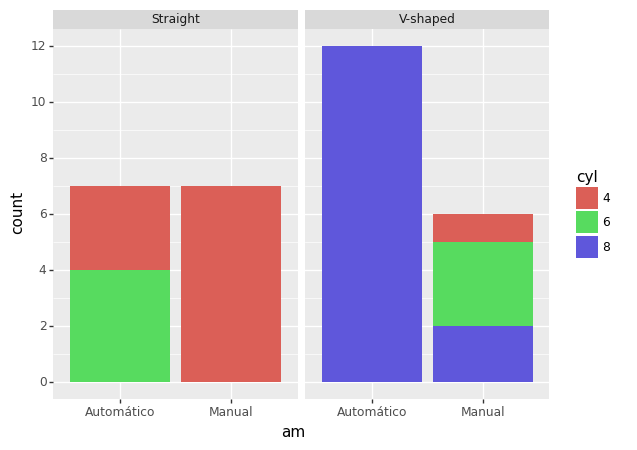

<ggplot: (8791944544281)>

In [ ]:
(ggplot(mtcars)+
 aes(x="am",fill="cyl")+
 geom_bar(stat="count",position="stack")+
 facet_wrap("vs")+
 scale_y_continuous(breaks=[0,2,4,6,8,10,12,14,16,18,19])
)

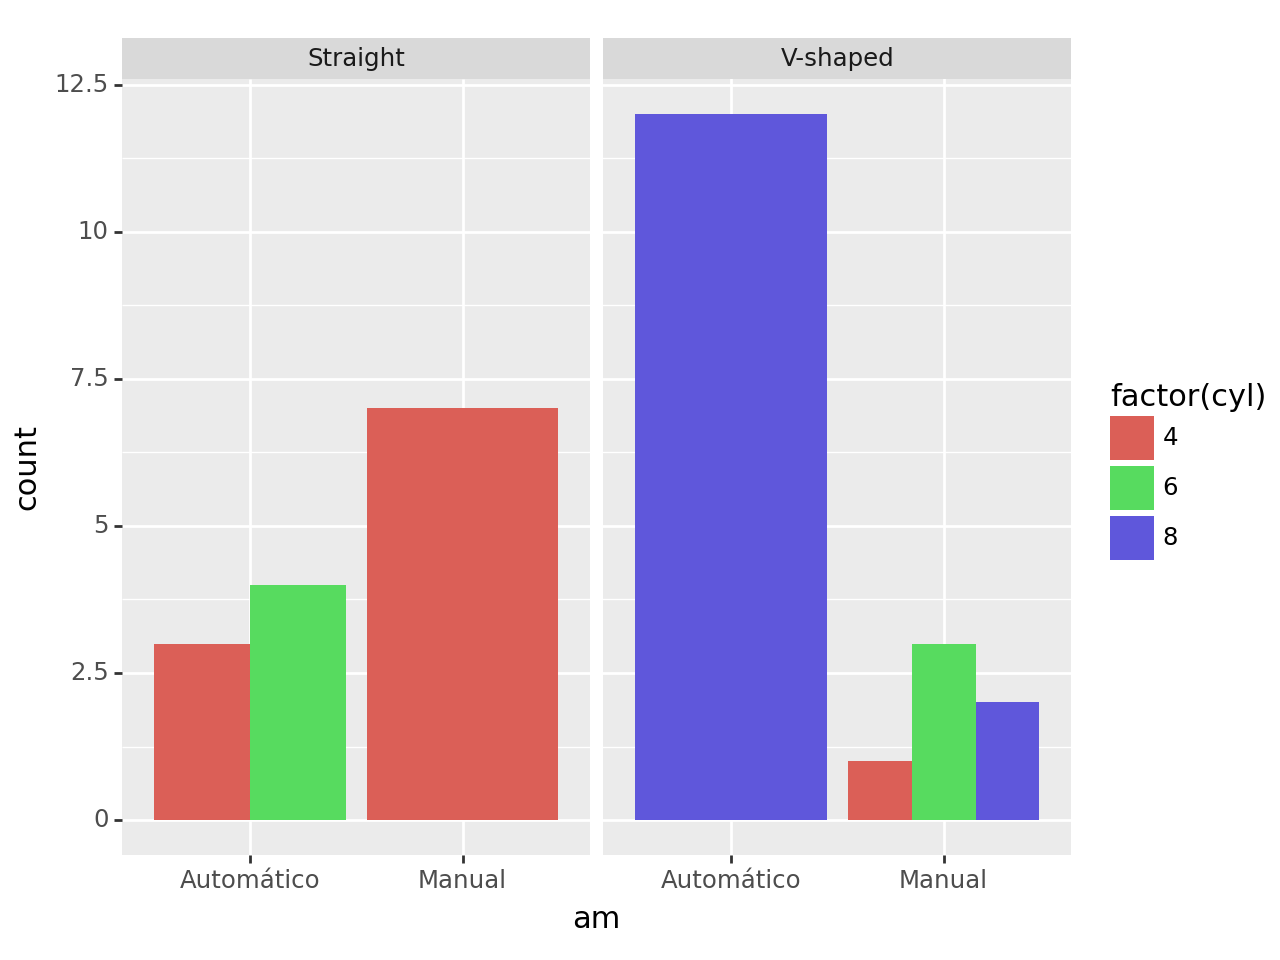

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(mtcars)+
 aes(x="am",fill="factor(cyl)")+
 geom_bar(stat="count",position="dodge")+
 facet_wrap("vs")
)